In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


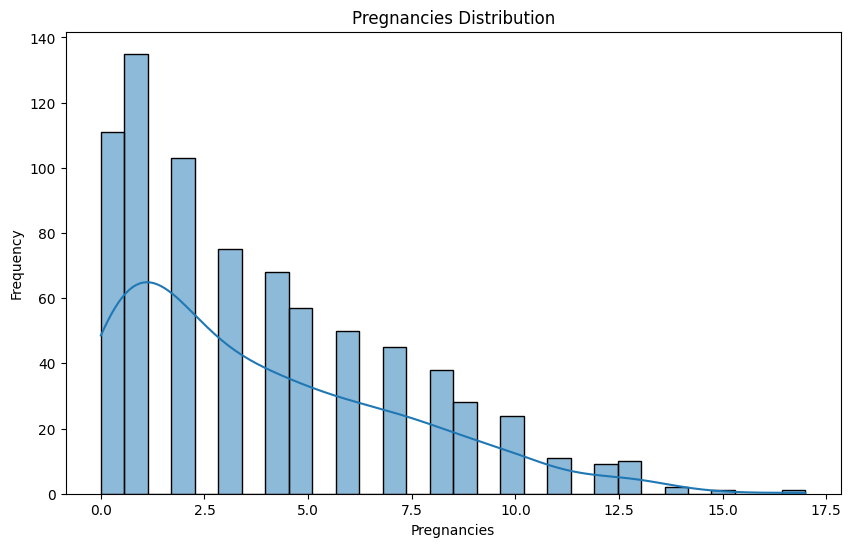

In [6]:
# Histogram for Pregnancies distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Pregnancies'], bins=30, kde=True)
plt.title('Pregnancies Distribution')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

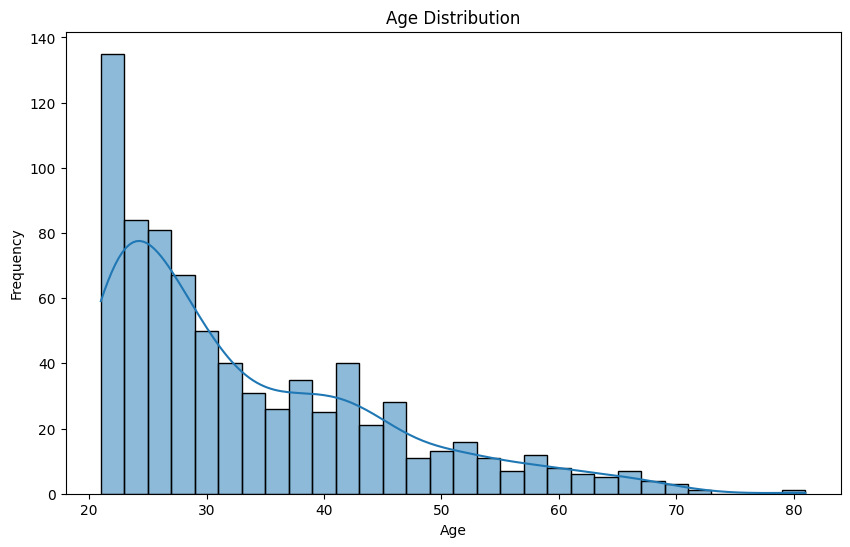

In [7]:
# Histogram for Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

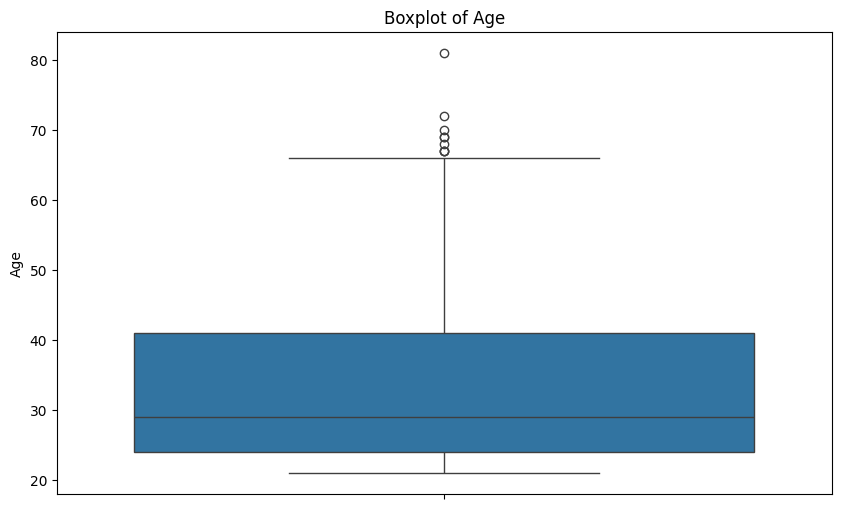

In [8]:
# Boxplot for Age (Detecting Outliers)
plt.figure(figsize=(10,6))
sns.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.show()

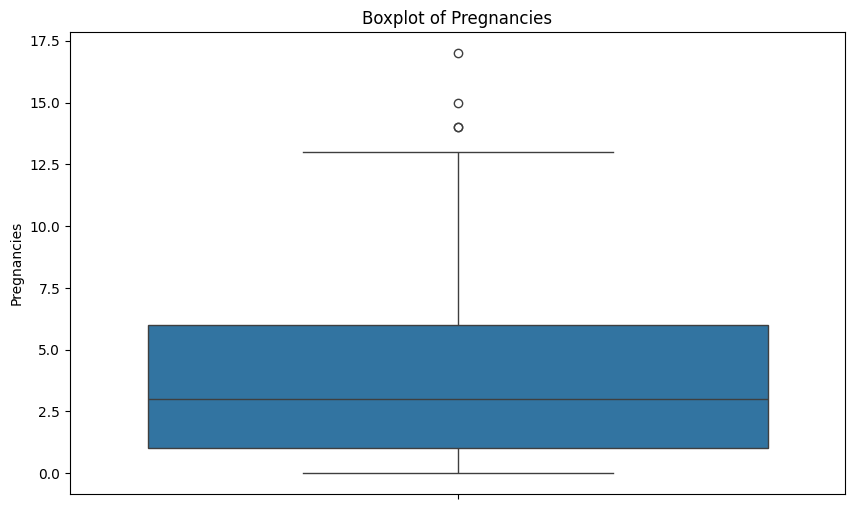

In [9]:
# Boxplot for Age (Detecting Outliers)
plt.figure(figsize=(10,6))
sns.boxplot(df['Pregnancies'])
plt.title('Boxplot of Pregnancies')
plt.show()

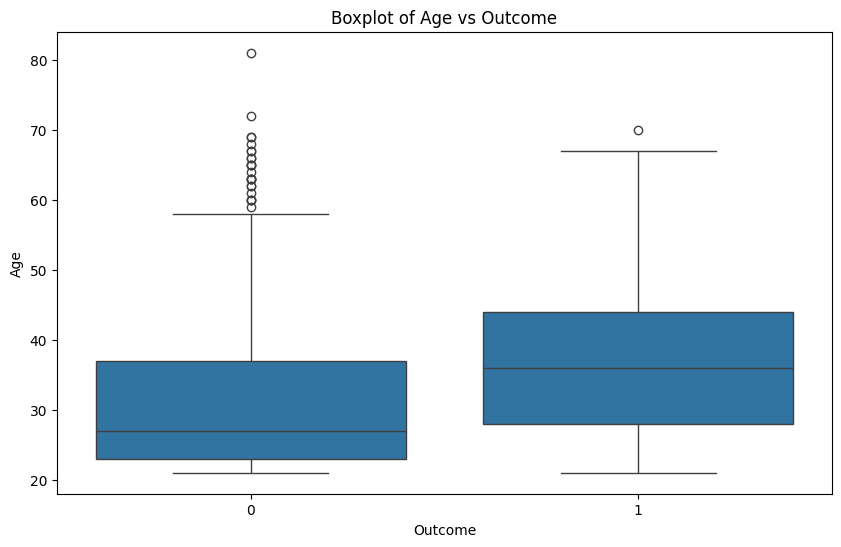

In [10]:
# Boxplot of Age vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Boxplot of Age vs Outcome')
plt.show()

In [11]:
# cols = ["Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI", 	"DiabetesPedigreeFunction",	"Age"]

# for col in cols:
#     std_scaler = StandardScaler()
#     df[col] = std_scaler.fit_transform(df[[col]])

# df.head()

In [12]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred_log = logistic_regression_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [16]:
accuracy = logistic_regression_model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_dec = dec_model.predict(X_test.values)

In [19]:
accuracy = dec_model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rndm_model = RandomForestClassifier(n_estimators=5, random_state=1)
cv_score = cross_val_score(rndm_model, X_train, y_train, cv =10)
cv_score.mean()

0.7280274986779481

In [21]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1, gamma=2)
cv_score = cross_val_score(svm_model, X_train, y_train, cv =10)
cv_score.mean()

0.7703067160232682

In [22]:
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_score = cross_val_score(knn_model, X_train, y_train, cv =10)
cv_score.mean()

0.7378635642517187

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
cv_score = cross_val_score(nb_model, X_train, y_train, cv =10)
cv_score.mean()

0.6045214172395558